# Pourquoi est-il important de mélanger les données avant d'entraîner un modèle de ML ?

In [8]:
## Suivre les instructions pour reproduire cette expérimentation !

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 300

In [2]:
np.random.seed(20)
torch.manual_seed(20)

## Créer le dataset

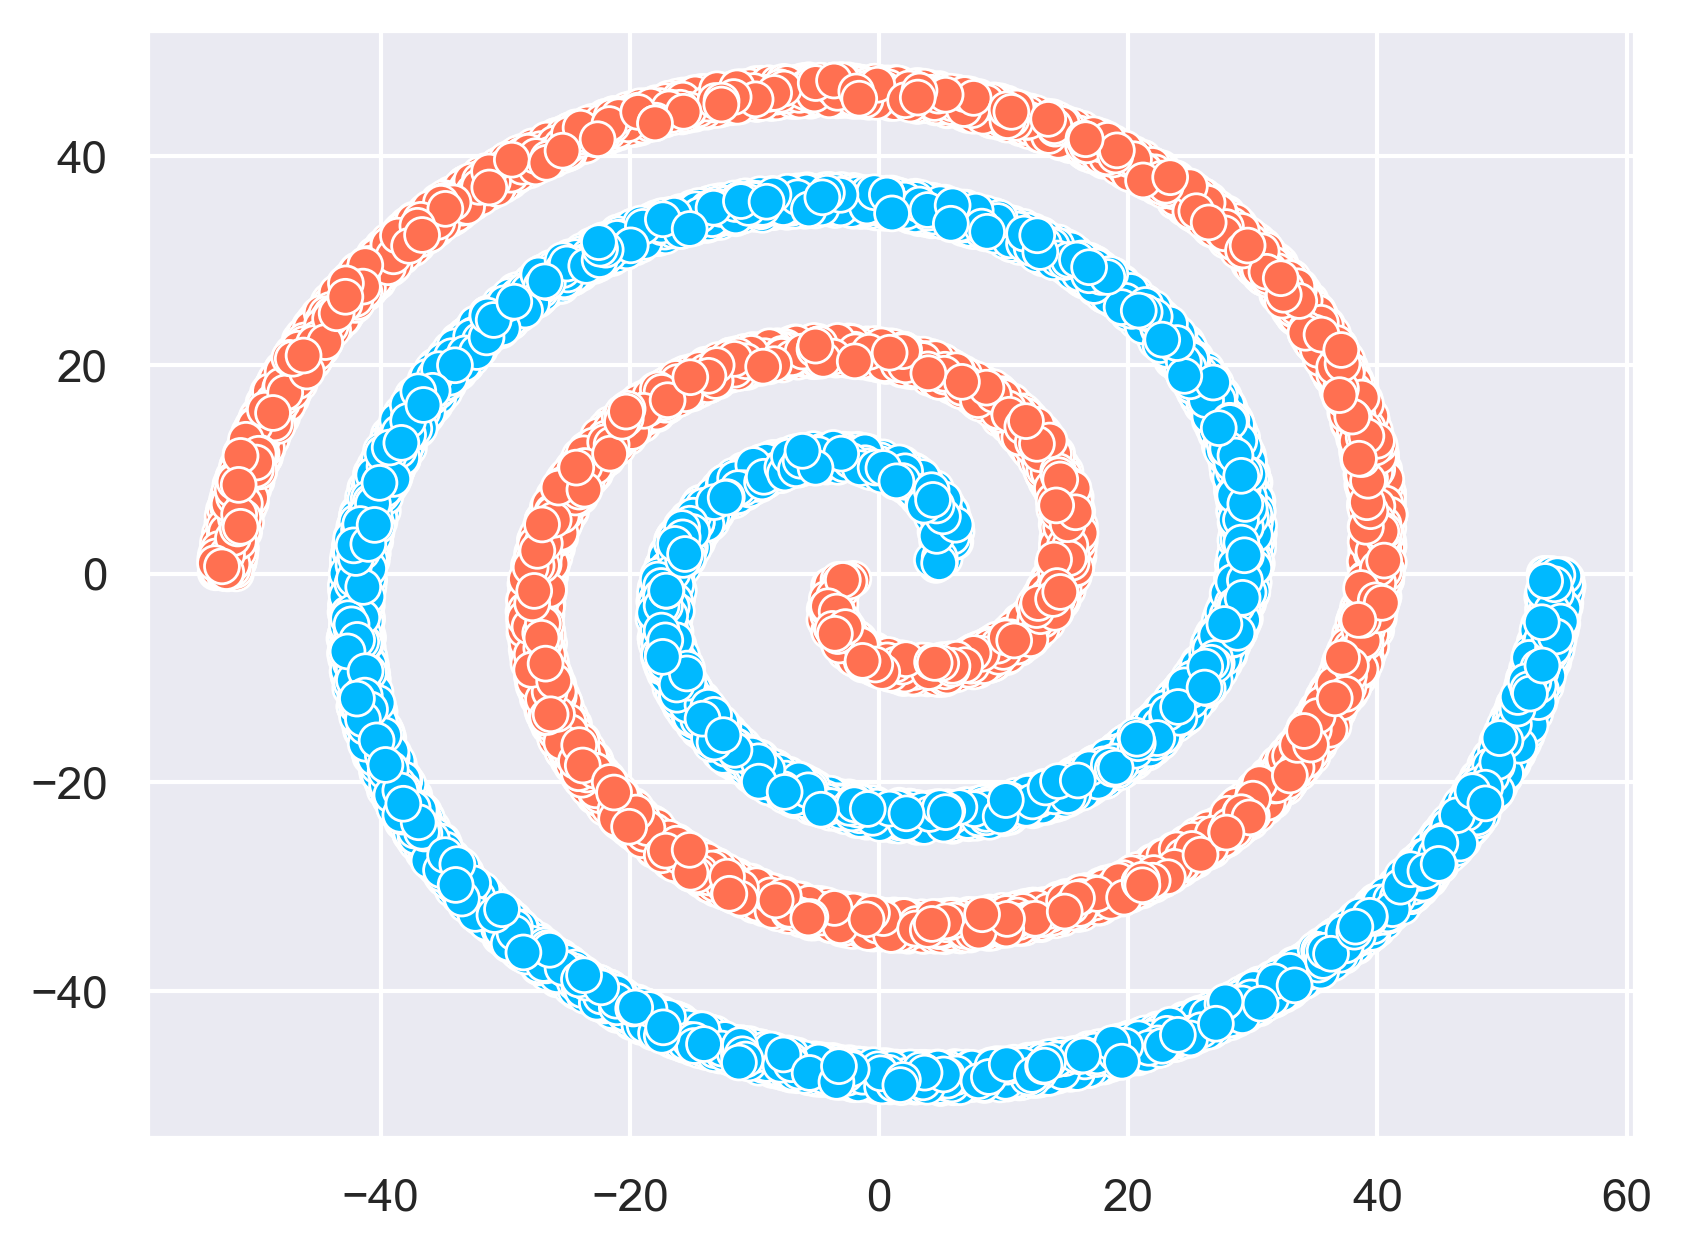

In [3]:
c_list = ['#46C7C7', '#00B9FF', '#FF7051'][::-1]

# Définir le nombre de points de données
N = 10000

# Définir les deux bras spiraux
theta = np.sqrt(np.random.rand(N)) * 4 * np.pi  # angle
r_a = 4 * theta + np.pi + 2*np.random.rand(N) # radius for arm a
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
r_b = -4 * theta - np.pi + 2*np.random.rand(N) # radius for arm b
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T

# Déplacer les deux bras pour qu'ils aient le même centre
shift = np.array([0,0])  # déplacement x-y
data_a += shift
data_b -= shift

# Concaténer les deux bras
data = np.concatenate((data_a, data_b))

# Création des étiquettes cibles (label Target)
labels = np.concatenate((np.ones(N), np.zeros(N)))
sns.scatterplot(x=data[:, 0], y=data[:, 1], c=[c_list[int(label)] for label in labels], s = 70, )
plt.show()

## Définir le réseau de neurones

In [4]:
# Définir l'architecture du réseau neuronal
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
def accuracy(outputs, labels):
    y_pred = outputs.squeeze().detach().numpy().round()
    return accuracy_score(y, y_pred)

## Entraînement du modèle 1

Exécuter cette section lors de la première exécution du notebook.

In [5]:
# Générer l'ensemble de données
x = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels.reshape(-1, 1), dtype=torch.float32)

In [6]:
total_epochs = 100
batch_size = 128

# Initialiser le modèle, l'optimiseur et la fonction de perte (loss)
model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(total_epochs):
    model.train()
    optimizer.zero_grad()
    
    full_loss = 0
    for i in range(0, x.shape[0], batch_size):
        optimizer.zero_grad()
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        full_loss += loss.item()
        
    outputs = model(x)
    acc = accuracy(outputs, y)
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}, Accuracy: {:.2f}%'.format(epoch+1, total_epochs, full_loss, acc*100))

Epoch [10/100], Loss: 109.68, Accuracy: 56.55%
Epoch [20/100], Loss: 136.02, Accuracy: 50.00%
Epoch [30/100], Loss: 105.24, Accuracy: 62.49%
Epoch [40/100], Loss: 103.97, Accuracy: 63.17%
Epoch [50/100], Loss: 104.81, Accuracy: 60.48%
Epoch [60/100], Loss: 103.78, Accuracy: 60.98%
Epoch [70/100], Loss: 104.35, Accuracy: 61.99%
Epoch [80/100], Loss: 106.09, Accuracy: 62.28%
Epoch [90/100], Loss: 104.31, Accuracy: 61.30%
Epoch [100/100], Loss: 102.30, Accuracy: 61.41%


## Entraînement du modèle 2

Redémarrer le notebook et, cette fois, n'exécute pas le code de la section 'Entraînement du modèle 1'. Cela permettra d'initialiser le modèle 2 avec les mêmes poids que précédemment.

In [5]:
# Mélanger les données et les étiquettes à l'unisson
indices = np.random.permutation(N * 2)
data, labels = data[indices], labels[indices]

In [6]:
# Générer l'ensemble de données
x = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels.reshape(-1, 1), dtype=torch.float32)

In [7]:
# Initialiser le modèle, l'optimiseur et la fonction de perte (loss)

total_epochs = 100
batch_size = 128

model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(total_epochs):
    model.train()
    optimizer.zero_grad()
    
    full_loss = 0
    for i in range(0, x.shape[0], batch_size):
        optimizer.zero_grad()
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        full_loss += loss.item()
        
    outputs = model(x)
    acc = accuracy(outputs, y)
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}, Accuracy: {:.2f}%'.format(epoch+1, total_epochs, full_loss, acc*100))

Epoch [10/100], Loss: 94.36, Accuracy: 58.70%
Epoch [20/100], Loss: 28.78, Accuracy: 99.76%
Epoch [30/100], Loss: 0.97, Accuracy: 100.00%
Epoch [40/100], Loss: 0.21, Accuracy: 100.00%
Epoch [50/100], Loss: 0.07, Accuracy: 100.00%
Epoch [60/100], Loss: 0.02, Accuracy: 100.00%
Epoch [70/100], Loss: 0.01, Accuracy: 100.00%
Epoch [80/100], Loss: 0.00, Accuracy: 100.00%
Epoch [90/100], Loss: 0.00, Accuracy: 100.00%
Epoch [100/100], Loss: 0.00, Accuracy: 100.00%
